## Computer Vision
### Module 4.  Geometry and Augmented Reality

#### Task 4.2: 

1. Find ellipse by = 5 points. How stable is 5-point method to errors?
        
2. Find ellipse by >= 6 points. How stable is 6-point method to errors?

3. Draw a dependence: How average maximum distance (deviation) between found ellipse and expected one depends on normally distributed error in given points. 
    
#### by Anastasiia Kasprova

    Link to Google Colab: https://colab.research.google.com/drive/1UFNQ_vv6XF0YKWLGPe6PQnk6F1vI0pUF
    Link to github: https://github.com/kasprova/CV_UCU/tree/master/module4/tasks/task1

downloading https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg


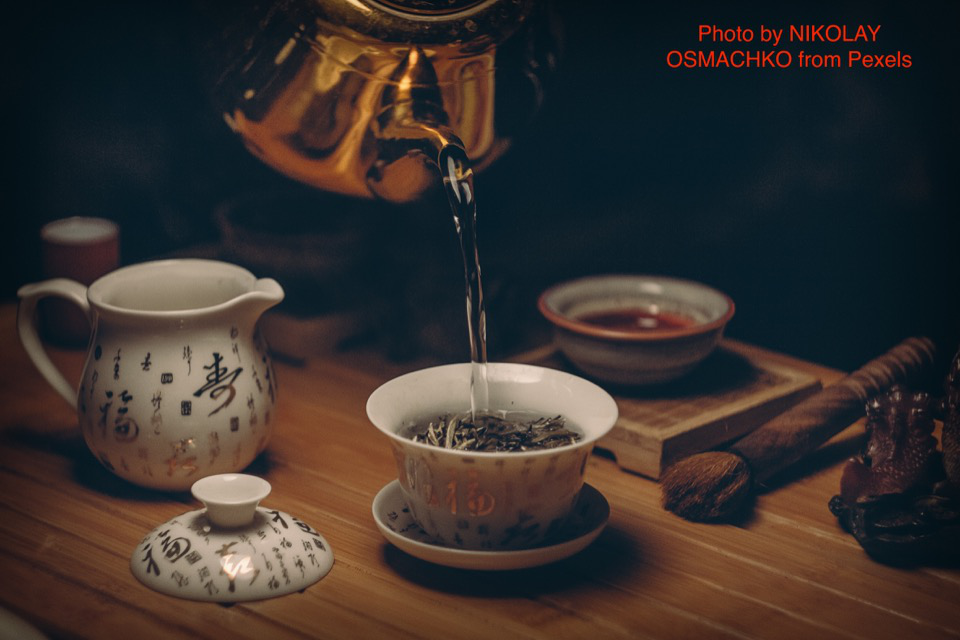

In [16]:
import cv2
import numpy as np
from math import *
from skimage import io
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

def url_to_image(url):
  print("downloading %s" % (url))
  return cv2.cvtColor(io.imread(url), cv2.COLOR_BGR2RGB)

url2 = "https://raw.githubusercontent.com/mdavydov/ComputerVisionCourse/master/tasks/ellipses/e1.jpg"
imgc = url_to_image(url2)
cv2_imshow(imgc)

### 4.2.1 Find ellipse by 5-point

[[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]
Ellipse 
[[-2.18569767e-08]]
[[-2.45345291e-08]]
[[-2.19079084e-08]]
[[-2.42143869e-08]]
[[-2.49710865e-08]]
u =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
m1v.T =  [[-3.17619447e-04  6.51716385e-01  7.58462690e-01]
 [-2.09090136e-03 -7.58461504e-01  6.51714489e-01]
 [ 9.99997764e-01 -1.37887347e-03  1.60357680e-03]]
v =  [[-3.17619447e-04 -2.09090136e-03  9.99997764e-01]
 [ 6.51716385e-01 -7.58461504e-01 -1.37887347e-03]
 [-7.58462690e-01 -6.51714489e-01 -1.60357680e-03]]
usv =  [[ 1.00000000e+00 -1.43150926e-01 -4.33622798e+02]
 [-1.43150926e-01  7.15055419e+00 -2.85454121e+03]
 [-4.33622798e+02 -2.85454121e+03  1.36521838e+06]]


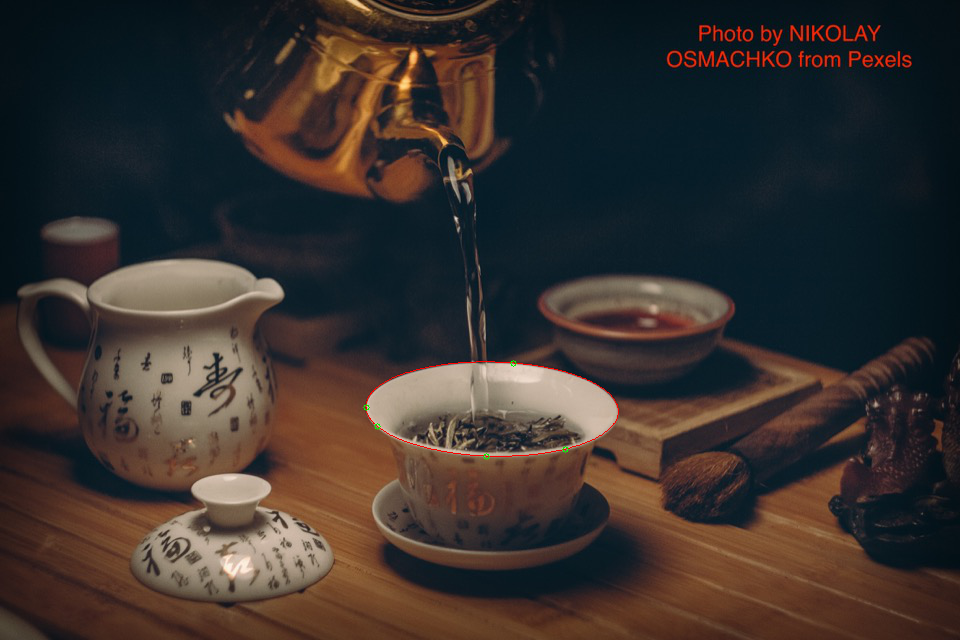

In [17]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### Check whether 5-points mathod is stable for error.
    1) adding 5px to Ox axis to one point
    2) adding 5px to Oy axis to one point

[[ 1.00000000e+00 -1.43093316e-01 -4.36561449e+02]
 [-1.43093316e-01  7.51357054e+00 -3.00407149e+03]
 [-4.36561449e+02 -3.00407149e+03  1.42893666e+06]]
Ellipse 
[[-4.22005542e-10]]
[[-6.17001206e-09]]
[[-2.54658516e-10]]
[[-1.80443749e-09]]
[[-4.16184776e-09]]
u =  [[-3.05512841e-04  6.50253976e-01  7.59716838e-01]
 [-2.10230935e-03 -7.59715612e-01  6.50252081e-01]
 [ 9.99997743e-01 -1.39849945e-03  1.59913789e-03]]
m1v.T =  [[-3.05512841e-04  6.50253976e-01  7.59716838e-01]
 [-2.10230935e-03 -7.59715612e-01  6.50252081e-01]
 [ 9.99997743e-01 -1.39849945e-03  1.59913789e-03]]
v =  [[-3.05512841e-04 -2.10230935e-03  9.99997743e-01]
 [ 6.50253976e-01 -7.59715612e-01 -1.39849945e-03]
 [-7.59716838e-01 -6.50252081e-01 -1.59913789e-03]]
usv =  [[ 1.00000000e+00 -1.43093316e-01 -4.36561449e+02]
 [-1.43093316e-01  7.51357054e+00 -3.00407149e+03]
 [-4.36561449e+02 -3.00407149e+03  1.42893666e+06]]


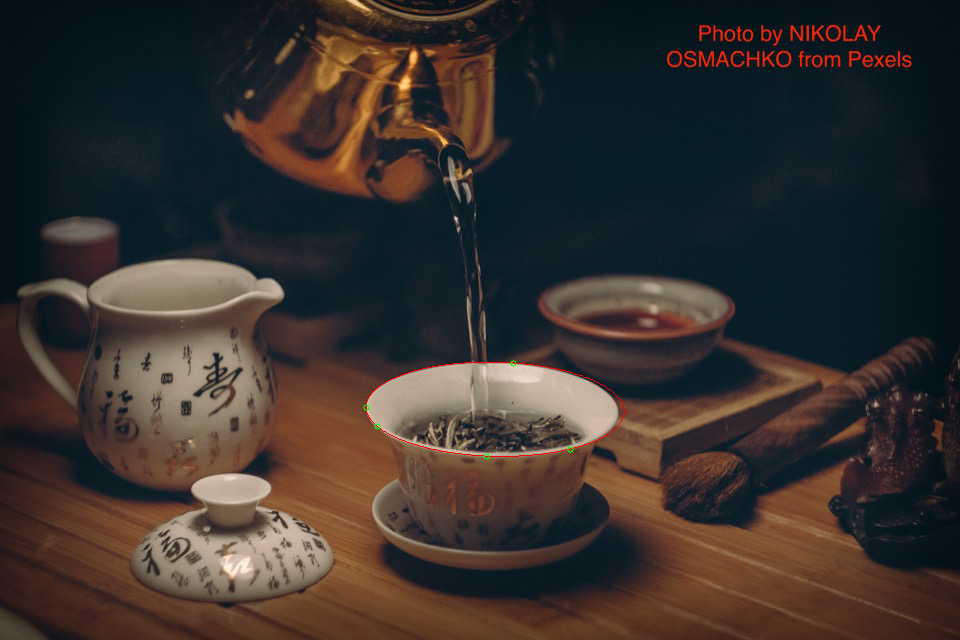

In [18]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565+5, 449] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

[[ 1.00000000e+00 -1.42828025e-01 -4.50093573e+02]
 [-1.42828025e-01  9.18521574e+00 -3.69263986e+03]
 [-4.50093573e+02 -3.69263986e+03  1.72235143e+06]]
Ellipse 
[[-1.68656697e-08]]
[[-6.92671165e-09]]
[[-1.74404704e-08]]
[[-1.17579475e-08]]
[[-6.08270057e-09]]
u =  [[-2.61323195e-04  6.43573428e-01  7.65384331e-01]
 [-2.14394902e-03 -7.65382959e-01  6.43571542e-01]
 [ 9.99997668e-01 -1.47276482e-03  1.57980094e-03]]
m1v.T =  [[-2.61323195e-04  6.43573428e-01  7.65384331e-01]
 [-2.14394902e-03 -7.65382959e-01  6.43571542e-01]
 [ 9.99997668e-01 -1.47276482e-03  1.57980094e-03]]
v =  [[-2.61323195e-04 -2.14394902e-03  9.99997668e-01]
 [ 6.43573428e-01 -7.65382959e-01 -1.47276482e-03]
 [-7.65384331e-01 -6.43571542e-01 -1.57980094e-03]]
usv =  [[ 1.00000000e+00 -1.42828025e-01 -4.50093573e+02]
 [-1.42828025e-01  9.18521574e+00 -3.69263986e+03]
 [-4.50093573e+02 -3.69263986e+03  1.72235143e+06]]


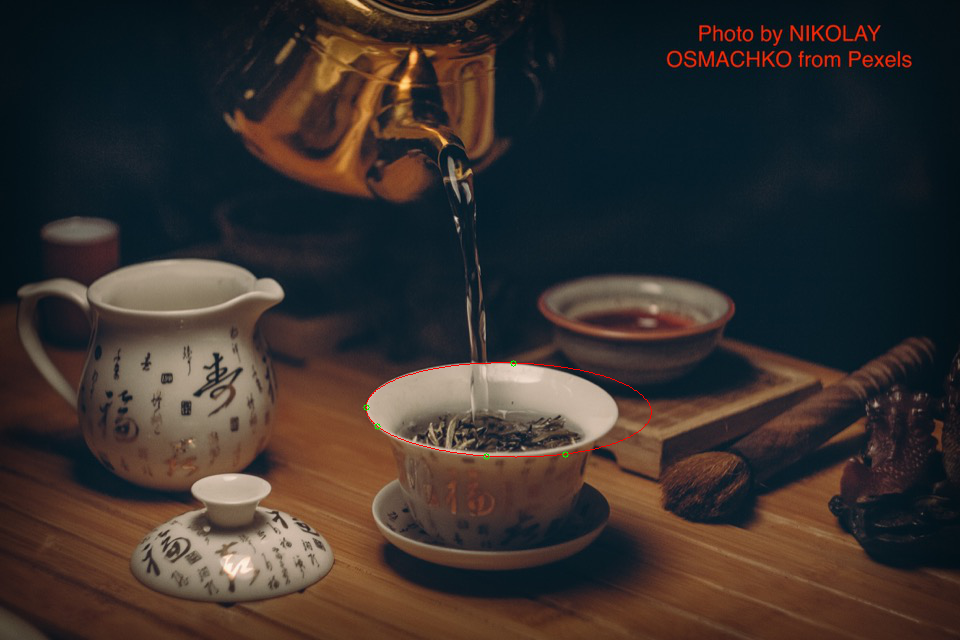

In [19]:
img = imgc.copy()

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449+5] ], np.double)

m = np.zeros((5,5))
r = np.zeros((5,1))

for k in range(0, len(points)):
  m[k][0] = 2*points[k][0]*points[k][1]
  m[k][1] = points[k][1]*points[k][1]
  m[k][2] = 2*points[k][0]
  m[k][3] = 2*points[k][1]
  m[k][4] = 1
  r[k] = points[k][0]*points[k][0]
  
p = -np.matmul(np.linalg.inv(m), r)

# p[0]=H  p[1]=B  p[2]=G  p[3]=F  p[4]=C
E = np.array(
      [[  1, p[0], p[2]],
      [p[0], p[1], p[3]],
      [p[2], p[3], p[4]] ], np.double )

print(E)

print( "Ellipse " if E[0,0]*E[1,1]>E[0,1]*E[1,0] else "Not Ellipse!!!")

# result on given points:
for k in range(0, len(points)):
  print( np.matmul( np.matmul( [ [points[k][0], points[k][1], 1] ], E ), [[points[k][0]],[points[k][1]],[1]] ) )
  
#find circle->ellipse conversion
u, s, v = np.linalg.svd(E)
u2 = np.matmul(u, np.diag(np.sqrt(s)) )
H = np.linalg.inv( u2.T)

print( "u = ", u )
print( "m1v.T = ", np.matmul(np.diag([1,1,-1]),  v ).T)

print( "v = ", v )
print( "usv = ", np.matmul(np.matmul(u, np.diag(s)), v) )



# draw ellipse
for alpha in range(0,360):
  a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
  a1 = (a1/a1[2])
  a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
  a2 = (a2/a2[2])
  cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

for k in range(0, len(points)):
  cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))
  
cv2_imshow(img)

#### Conclusion 1:  
A small change of a single point position by 5px along Ox axis make an ellipse change it shape in Ox direction by almost same distance.
However, the same change applied to Oy direction make a huge impact on ellipse shape (extra 15-20px).

### 4.2.2 Find ellipse by 6 points

In [0]:
def get_ellipse(img, points):
    "len(points)>=6"

    m = np.zeros((len(points),6))

    for k in range(0, len(points)):
      m[k][0] = points[k][0]*points[k][0]
      m[k][1] = 2*points[k][0]*points[k][1]
      m[k][2] = points[k][1]*points[k][1]
      m[k][3] = 2*points[k][0]
      m[k][4] = 2*points[k][1]
      m[k][5] = 1

    mu, ms, mv = np.linalg.svd(m)
    R = mv[5,:] # last row of mv 
    # R[0]=A R[1]=H  R[2]=B  R[3]=G  R[4]=F  R[5]=C 
    R /= R[0]

    E = np.array([[R[0], R[1], R[3]],
                  [R[1], R[2], R[4]],
                  [R[3], R[4], R[5]]], np.double)

  
    #find circle->ellipse conversion
    u, s, v = np.linalg.svd(E)
    u2 = np.matmul(u, np.diag(np.sqrt(s)) )
    H = np.linalg.inv( u2.T)
    
    return H

In [0]:
def draw_ellipse(img, points, H):
    # draw ellipse
    for alpha in range(0,360):
      a1 = np.matmul( H, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
      a1 = (a1/a1[2])
      a2 = np.matmul( H, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
      a2 = (a2/a2[2])
      cv2.line(img, (a1[0],a1[1]),(a2[0],a2[1]),(0,0,255), 1)

    for k in range(0, len(points)):
      cv2.circle(img, (int(points[k][0]),int(points[k][1])),3,(0,255,0))

    cv2_imshow(img)

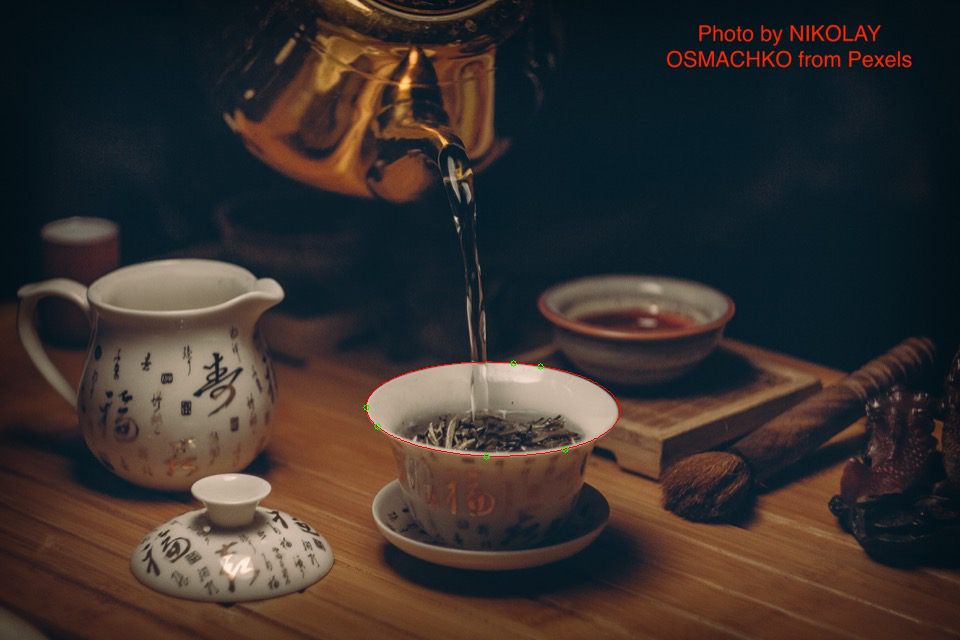

In [22]:
img = imgc.copy()
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [540,366] ], np.double)
H = get_ellipse(img,points)
draw_ellipse(img, points, H)

#### Check whether 6-points method is stable for error.
    1) adding 5px to Ox axis to one point (the same as above)
    2) adding 5px to Oy axis to one point (the same as above)

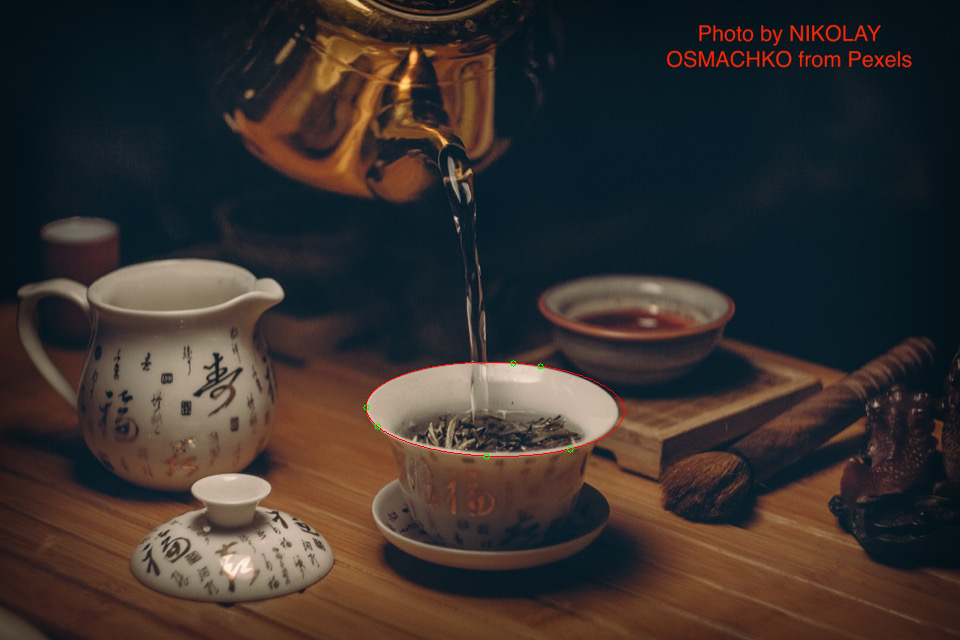

In [23]:
#add 5px to Ox coordinate of a point
img = imgc.copy()
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565+5, 449], [540,366] ], np.double)
H = get_ellipse(img,points)
draw_ellipse(img, points, H)

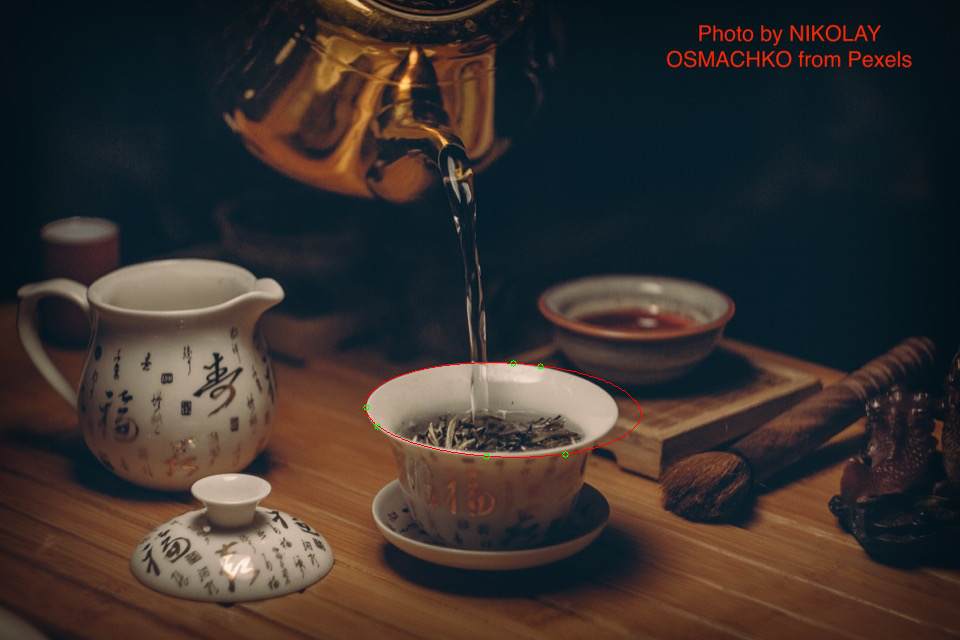

In [24]:
#add 5px to Oy coordinate of a point
img = imgc.copy()
points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449+5], [540,366] ], np.double)
H = get_ellipse(img,points)
draw_ellipse(img, points, H)

#### Conclusion 2:
6-point method is more stable for the errors compared to 5-point one. The changes in x,y coordinate of a single point do not demormate the shape of the ellipse much.

### 4.2.3  Draw a dependence: How average maximum distance (deviation) between found ellipse and expected one depends on normally distributed error in given points. 


In [0]:
def max_deviation(H1, H2):
    
    deviation = np.zeros((360,1), np.float32)  
    for alpha in range(0,360):
        #coordinates of the point of expected ellipse
        a1 = np.matmul( H1, [[sin(pi*alpha/180)], [cos(pi*alpha/180)], [1]] )
        a1 = (a1/a1[2])
        #coordinates of the point of found ellipse
        a2 = np.matmul( H2, [[sin(pi*(alpha+1)/180)], [cos(pi*(alpha+1)/180)], [1]] )
        a2 = (a2/a2[2])
        #distance between points
        deviation[alpha] = np.sqrt((a1[0]-a2[0])**2 + (a1[1]-a2[1])**2)
    
    return np.max(deviation)

In [0]:
def get_points_with_random_normal_shift(points, sigma):
    
    points_shifted = np.zeros_like(points)
    for i, pts in enumerate(points):
        points_shifted[i][0] = int(np.random.normal(pts[0], sigma, size = 1)[0])
        points_shifted[i][1] = int(np.random.normal(pts[1], sigma, size = 1)[0])
    
    return points_shifted

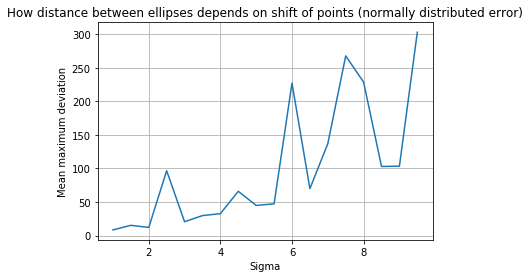

In [71]:
np.random.seed(1)
#number of experiments
N = 10

points = np.array([ [366, 407], [513, 363], [377, 426], [486, 456], [565, 449], [540,366] ], np.double)

#x,y to plot the dependance: x corresponds to sigma, y - mean max deviation
x = np.zeros(len(np.arange(1,10,0.5)),np.double)
y = np.zeros(len(np.arange(1,10,0.5)),np.double)



#find H of expected ellipse
H_expected = get_ellipse(img, points)
#loop over range of sigmas from 1 to 21 with a step of 1
for i, sigma in enumerate(np.arange(1,10,0.5)):
    #initiate a list to collect the max distances between 2 ellipses during N experiments
    max_dev_list = np.zeros(N,np.double)
    #loop over number of experiments
    for n in range(N):
        #find shifted points
        points_shifted = get_points_with_random_normal_shift(points, sigma)
        #find H for shifted points
        H_found = get_ellipse(img, points_shifted)
        #find the longest distance between 2 ellipses
        max_dev_list[n] = max_deviation(H_expected,H_found)
    #find mean max_deviation
    avg_max_dev = np.mean(max_dev_list)
    #data for plotting
    x[i] = sigma
    y[i] = avg_max_dev
    
#plot the dependence y(x):
plt.plot(x,y)
plt.title("How distance between ellipses depends on shift of points (normally distributed error)")
plt.xlabel("Sigma")
plt.ylabel("Mean maximum deviation")
plt.grid(True)
plt.show()